# Data Cleaning

#### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### Loading the raw data

In [2]:
raw_data = pd.read_csv('/kaggle/input/car-features-and-prices-dataset/data.csv')
raw_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


### Determing the variable of interest

In [4]:
data = raw_data.drop(['Market Category','Model'],axis=1)
data.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,NaN,10,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,NaN,7172,NaN,NaN,8266,4787,NaN,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


### Dealing with missing values

In [5]:
data.isnull().sum()

Make                  0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11812,11812.000000,11812,11812.000000,11812.000000,11812,11812,11812.000000,11812,11812,11812.000000,11812.000000,11812.000000,1.181200e+04
unique,47,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,7155,NaN,NaN,8231,4732,NaN,4708,3013,NaN,NaN,NaN,NaN
mean,NaN,2010.361581,NaN,249.504487,5.649424,NaN,NaN,3.432526,NaN,NaN,26.320945,19.328141,1553.679902,4.055994e+04
std,NaN,7.594647,NaN,109.206947,1.751646,NaN,NaN,0.882919,NaN,NaN,7.443589,6.527734,1440.067820,6.028413e+04
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.099000e+04
50%,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,2.997000e+04
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.220500e+04


### Exploring PDFs

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


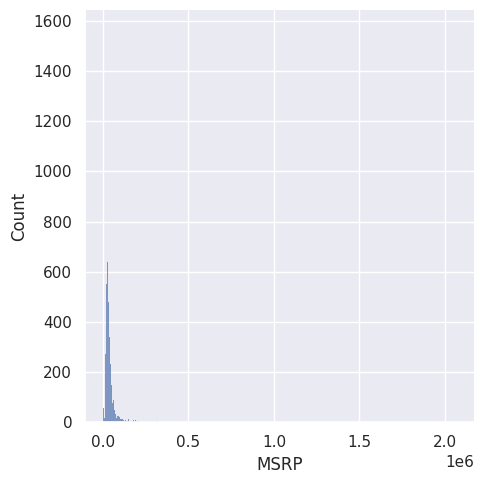

In [7]:
sns.displot(data_no_mv['MSRP'])

### Dealing with outliers

In [8]:
q = data_no_mv['MSRP'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['MSRP']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11693,11693.000000,11693,11693.000000,11693.000000,11693,11693,11693.000000,11693,11693,11693.000000,11693.000000,11693.000000,11693.000000
unique,45,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,7155,NaN,NaN,8161,4732,NaN,4684,2982,NaN,NaN,NaN,NaN
mean,NaN,2010.349867,NaN,246.096382,5.591807,NaN,NaN,3.441461,NaN,NaN,26.417087,19.416488,1561.167964,36552.149406
std,NaN,7.622035,NaN,103.785549,1.655155,NaN,NaN,0.878292,NaN,NaN,7.416042,6.499939,1442.580413,35605.267421
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,8.000000,2.000000,2000.000000
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,20890.000000
50%,NaN,2015.000000,NaN,225.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,29775.000000
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,41750.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


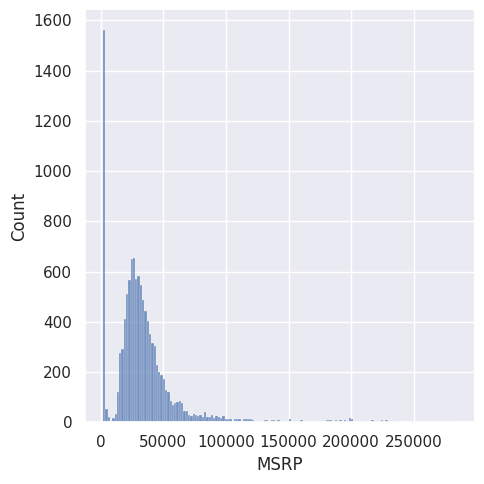

In [9]:
sns.displot(data_1['MSRP'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


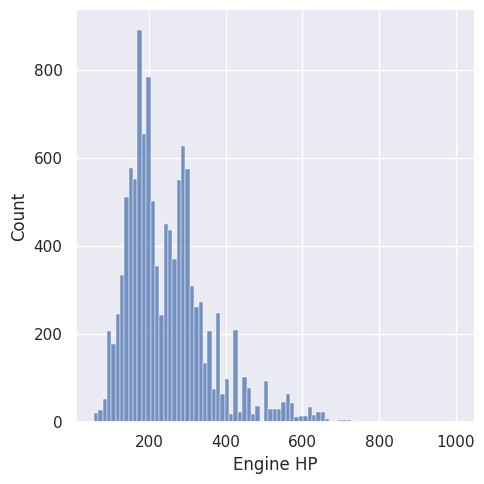

In [10]:
sns.displot(data_no_mv['Engine HP'])

In [11]:
q = data_no_mv['Engine HP'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Engine HP']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11691,11691.000000,11691,11691.000000,11691.000000,11691,11691,11691.000000,11691,11691,11691.000000,11691.000000,11691.000000,11691.000000
unique,46,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1095,NaN,7155,NaN,NaN,8189,4732,NaN,4651,2999,NaN,NaN,NaN,NaN
mean,NaN,2010.324352,NaN,245.255154,5.598067,NaN,NaN,3.444444,NaN,NaN,26.397229,19.402874,1555.907279,37894.273715
std,NaN,7.619412,NaN,101.219474,1.674197,NaN,NaN,0.876783,NaN,NaN,7.437790,6.516246,1443.440638,42705.030300
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,8.000000,2.000000,2000.000000
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,20887.500000
50%,NaN,2015.000000,NaN,225.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,29775.000000
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,41725.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


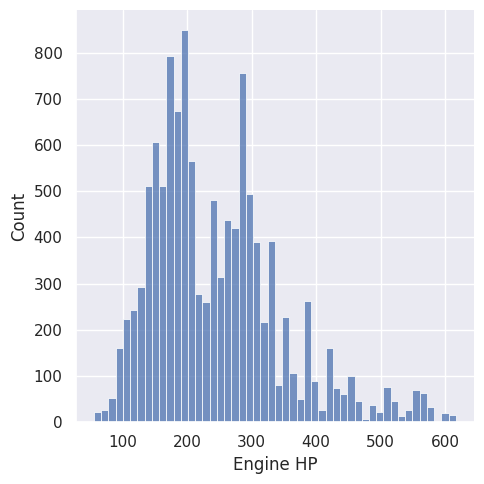

In [12]:
sns.displot(data_1['Engine HP'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


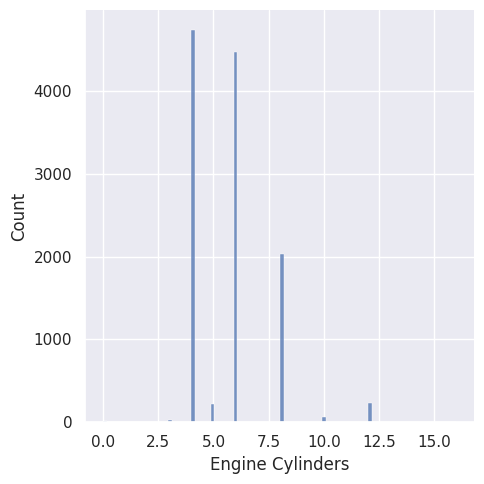

In [13]:
sns.displot(data_no_mv['Engine Cylinders'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


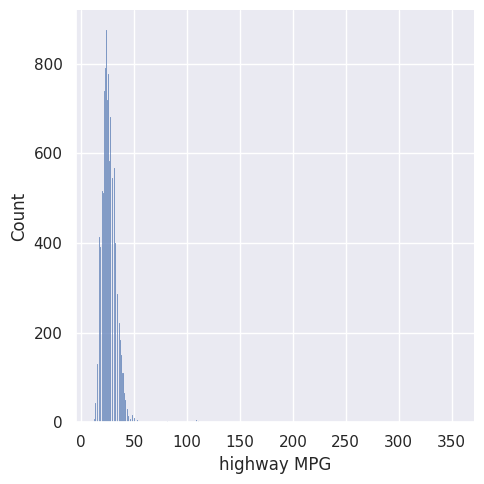

In [14]:
sns.displot(data_no_mv['highway MPG'])

In [15]:
q = data_no_mv['highway MPG'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['highway MPG']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11673,11673.000000,11673,11673.000000,11673.000000,11673,11673,11673.000000,11673,11673,11673.000000,11673.000000,11673.000000,1.167300e+04
unique,47,NaN,8,NaN,NaN,4,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1106,NaN,7067,NaN,NaN,8143,4600,NaN,4611,2961,NaN,NaN,NaN,NaN
mean,NaN,2010.310032,NaN,250.840487,5.674205,NaN,NaN,3.426112,NaN,NaN,25.999058,18.965647,1550.493703,4.072336e+04
std,NaN,7.616780,NaN,109.080170,1.742506,NaN,NaN,0.885809,NaN,NaN,5.995022,4.962671,1445.468121,6.061765e+04
min,NaN,1990.000000,NaN,55.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,15.000000,549.000000,2.096000e+04
50%,NaN,2015.000000,NaN,230.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,25.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,2016.000000,NaN,302.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.240000e+04


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


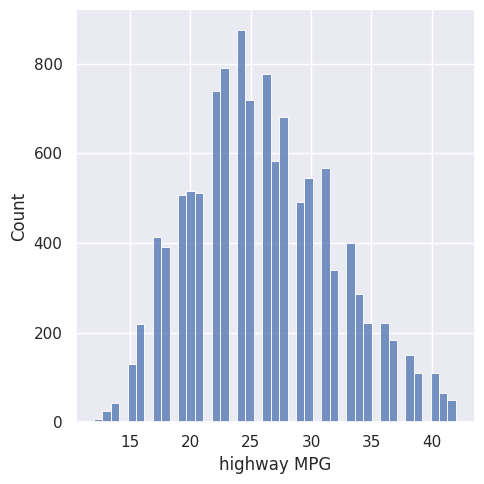

In [16]:
sns.displot(data_1['highway MPG'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


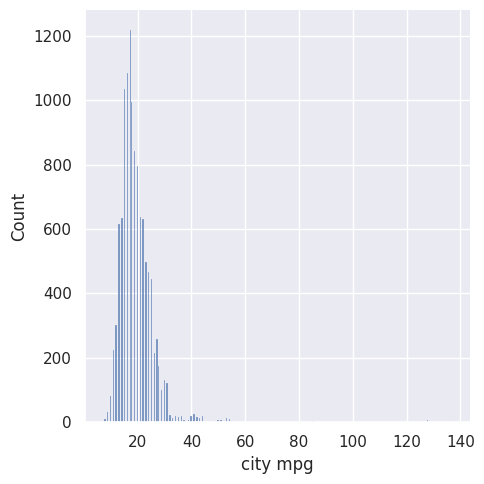

In [17]:
sns.displot(data_no_mv['city mpg'])

In [18]:
q = data_no_mv['city mpg'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['city mpg']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11680,11680.000000,11680,11680.000000,11680.000000,11680,11680,11680.000000,11680,11680,11680.000000,11680.000000,11680.000000,1.168000e+04
unique,47,NaN,8,NaN,NaN,4,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1107,NaN,7046,NaN,NaN,8124,4604,NaN,4628,2969,NaN,NaN,NaN,NaN
mean,NaN,2010.307791,NaN,250.698630,5.672517,NaN,NaN,3.426113,NaN,NaN,26.051627,18.942209,1545.220548,4.070442e+04
std,NaN,7.618822,NaN,109.168523,1.743319,NaN,NaN,0.885820,NaN,NaN,6.765328,4.853995,1438.088617,6.060518e+04
min,NaN,1990.000000,NaN,55.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,15.000000,549.000000,2.092500e+04
50%,NaN,2015.000000,NaN,230.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,25.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,2016.000000,NaN,302.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.240000e+04


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


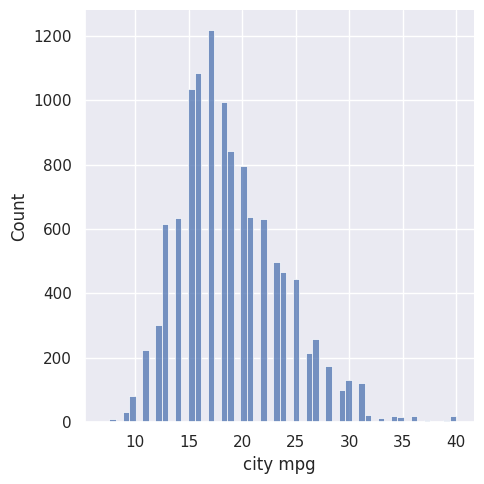

In [19]:
sns.displot(data_1['city mpg'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


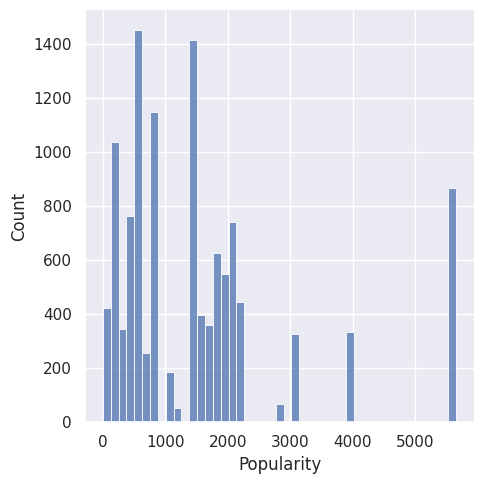

In [20]:
sns.displot(data_no_mv['Popularity'])

In [21]:
q = data_no_mv['Popularity'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Popularity']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,10944,10944.000000,10944,10944.000000,10944.000000,10944,10944,10944.000000,10944,10944,10944.000000,10944.000000,10944.000000,1.094400e+04
unique,46,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,6593,NaN,NaN,7609,4466,NaN,4470,2905,NaN,NaN,NaN,NaN
mean,NaN,2010.412555,NaN,250.012610,5.626096,NaN,NaN,3.437135,NaN,NaN,26.525585,19.462445,1228.233827,4.160421e+04
std,NaN,7.554283,NaN,110.678246,1.772906,NaN,NaN,0.886337,NaN,NaN,7.513191,6.580292,892.654875,6.233989e+04
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.099500e+04
50%,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1013.000000,3.001750e+04
75%,NaN,2016.000000,NaN,302.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,1851.000000,4.287250e+04


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


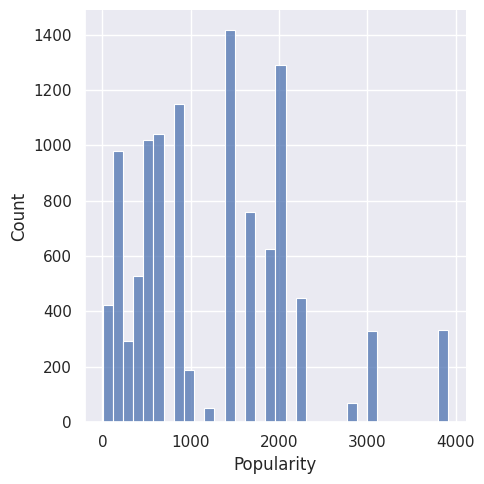

In [22]:
sns.displot(data_1['Popularity'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


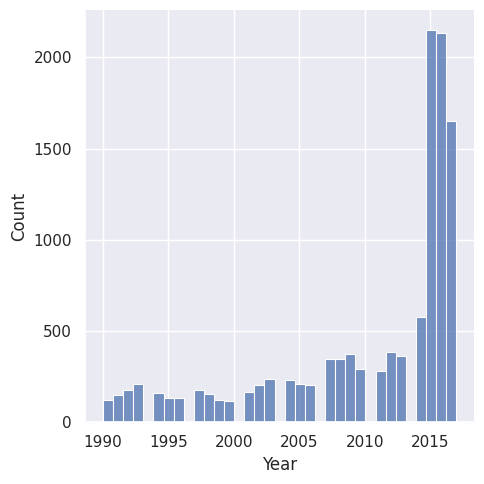

In [23]:
sns.displot(data_no_mv['Year'])

In [24]:
data_cleaned = data_1.reset_index(drop=True)

In [25]:
data_cleaned.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,10944,10944.000000,10944,10944.000000,10944.000000,10944,10944,10944.000000,10944,10944,10944.000000,10944.000000,10944.000000,1.094400e+04
unique,46,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,6593,NaN,NaN,7609,4466,NaN,4470,2905,NaN,NaN,NaN,NaN
mean,NaN,2010.412555,NaN,250.012610,5.626096,NaN,NaN,3.437135,NaN,NaN,26.525585,19.462445,1228.233827,4.160421e+04
std,NaN,7.554283,NaN,110.678246,1.772906,NaN,NaN,0.886337,NaN,NaN,7.513191,6.580292,892.654875,6.233989e+04
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.099500e+04
50%,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1013.000000,3.001750e+04
75%,NaN,2016.000000,NaN,302.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,1851.000000,4.287250e+04


# OLS Assumptions

# Create Dummies

# Training and Testing

# Improving Model Performance